# Load and preprocess time series data files

In [1]:
path = '../../data/FRED/CORESTICKM159SFRBATL.csv'

## Load data from CSV

### Having datetime column

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(path)
df

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
...,...,...
685,2025-02-01,3.516515
686,2025-03-01,3.257815


In [4]:
df.observation_date

0      1968-01-01
1      1968-02-01
          ...    
685    2025-02-01
686    2025-03-01
Name: observation_date, Length: 687, dtype: object

In [5]:
df.observation_date.dt.to_period('Q')

AttributeError: Can only use .dt accessor with datetimelike values

In [6]:
df.observation_date = pd.to_datetime(df.observation_date)

In [7]:
df.observation_date

0     1968-01-01
1     1968-02-01
         ...    
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

In [8]:
df.observation_date.dt.to_period('Q')

0      1968Q1
1      1968Q1
        ...  
685    2025Q1
686    2025Q1
Name: observation_date, Length: 687, dtype: period[Q-DEC]

In [9]:
path

'../../data/FRED/CORESTICKM159SFRBATL.csv'

In [10]:
df = pd.read_csv(path, parse_dates=['observation_date'])

In [11]:
df.observation_date

0     1968-01-01
1     1968-02-01
         ...    
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

### Having no datetime column

In [12]:
path = '../../data/EIA/demand_cal_historical_datetime-split.csv'

In [13]:
df = pd.read_csv(path)

df

,year,month,day,hour,value
0,2019,1,1,0,28487
1,2019,1,1,1,30507
...,...,...,...,...,...
55090,2025,4,14,10,24600
55091,2025,4,14,11,22598


In [14]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [ ]:
df

,year,month,day,hour,value,datetime
0,2019,1,1,0,28487,2019-01-01 00:00:00
1,2019,1,1,1,30507,2019-01-01 01:00:00
...,...,...,...,...,...,...
55090,2025,4,14,10,24600,2025-04-14 10:00:00
55091,2025,4,14,11,22598,2025-04-14 11:00:00


## Temporal column to index

In [23]:
df.datetime.dt.to_period('Q')

0        2019Q1
1        2019Q1
          ...  
55090    2025Q2
55091    2025Q2
Name: datetime, Length: 55092, dtype: period[Q-DEC]

In [26]:
df_idx = df.set_index('datetime')

In [31]:
df_idx.index.to_period('Q')

PeriodIndex(['2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             ...
             '2025Q2', '2025Q2', '2025Q2', '2025Q2', '2025Q2', '2025Q2',
             '2025Q2', '2025Q2', '2025Q2', '2025Q2'],
            dtype='period[Q-DEC]', name='datetime', length=55092)

In [37]:
df_idx

,year,month,day,hour,value
datetime,,,,,
2019-01-01 00:00:00,2019,1,1,0,28487
2019-01-01 01:00:00,2019,1,1,1,30507
...,...,...,...,...,...
2025-04-14 10:00:00,2025,4,14,10,24600
2025-04-14 11:00:00,2025,4,14,11,22598


<Axes: xlabel='datetime'>

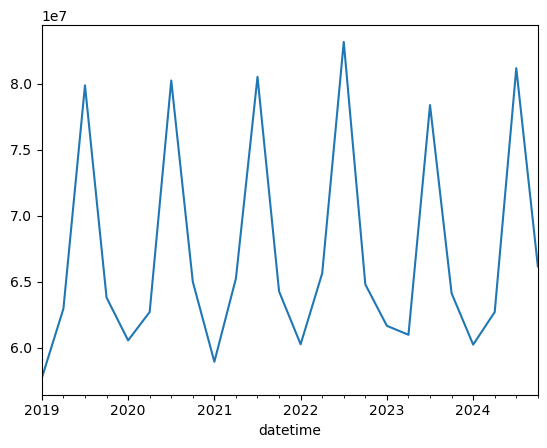

In [36]:
df_idx.loc[:'2024'].resample('QS').value.sum().plot.line()

,year,month,day,hour,value
datetime,,,,,
2019-01-01 00:00:00,2019,1,1,0,28487
2019-01-01 01:00:00,2019,1,1,1,30507
...,...,...,...,...,...
2025-04-14 10:00:00,2025,4,14,10,24600
2025-04-14 11:00:00,2025,4,14,11,22598


## Load data from Excel

In [39]:
path = '../../data/FRED/CORESTICKM159SFRBATL.xlsx'

In [46]:
df = pd.read_excel(path, sheet_name=1, index_col=0)

In [48]:
df.index

DatetimeIndex(['1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
               '1968-09-01', '1968-10-01',
               ...
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', name='observation_date', length=687, freq=None)